In [2]:
pip install nltk textblob wordcloud

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 6.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.3 MB/s eta 0:00:00 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
#reading the csv
df_reviews = pd.read_csv("googleplaystore_user_reviews.csv")
df_reviews.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
#removing null values
df_reviews.dropna(subset=['Translated_Review'], inplace=True)
df_reviews = df_reviews[df_reviews['Translated_Review'].str.strip() != '']


In [5]:
#Defining the sentimentss

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # -1 = negative, +1 = positive

df_reviews['Sentiment_Score'] = df_reviews['Translated_Review'].apply(get_sentiment)


In [6]:
#labelling them

def label_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df_reviews['Sentiment_Label'] = df_reviews['Sentiment_Score'].apply(label_sentiment)


In [8]:
#visualising these Sentiments

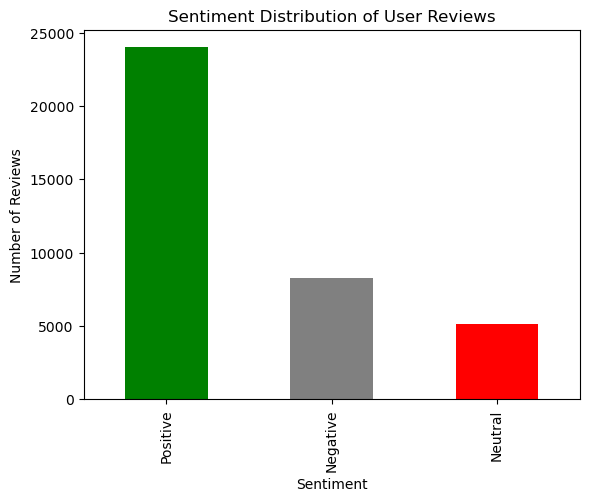

In [7]:
df_reviews['Sentiment_Label'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution of User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


In [8]:
positive_text = ' '.join(df_reviews[df_reviews['Sentiment_Label'] == 'Positive']['Translated_Review'])
negative_text = ' '.join(df_reviews[df_reviews['Sentiment_Label'] == 'Negative']['Translated_Review'])

WordCloud(background_color='white').generate(positive_text).to_image().show()
WordCloud(background_color='black').generate(negative_text).to_image().show()


Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


image/png D)ownload, or C)ancel(B;49m(B(BGetting file://localhost/tmp/tmphzfdew2r.PNG(B

>

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


image/png D)ownload, or C)ancel(B;49m(B(BGetting file://localhost/tmp/tmpefm_jc_k.PNG(B

>

In [9]:
# Create WordCloud
wordcloud = WordCloud(background_color='white').generate(positive_text)

# Save it to file
wordcloud.to_file('positive_wordcloud.png')

# Repeat for negative
wordcloud = WordCloud(background_color='black').generate(negative_text)
wordcloud.to_file('negative_wordcloud.png')


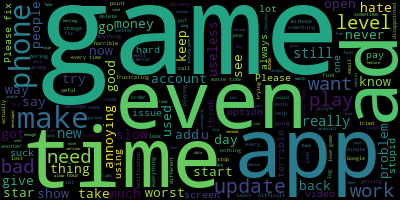

In [10]:
from IPython.display import Image, display

wordcloud.to_file('positive.png')
display(Image(filename='positive.png'))


In [18]:
print(df_reviews.columns)


Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


In [19]:
import pandas as pd

# Load your main app data
df = pd.read_csv('googleplaystore.csv')


In [20]:
app_sentiment = df_reviews.groupby('App')['Sentiment_Polarity'].mean().reset_index()  
df = df.merge(app_sentiment, on='App', how='left')


In [22]:
df[['App', 'Rating', 'Sentiment_Polarity']]

,App,Rating,Sentiment_Polarity
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,NaN
1,Coloring book moana,3.9,0.152652
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,NaN
3,Sketch - Draw & Paint,4.5,NaN
4,Pixel Draw - Number Art Coloring Book,4.3,NaN
...,...,...,...
10836,Sya9a Maroc - FR,4.5,NaN
10837,Fr. Mike Schmitz Audio Teachings,5.0,NaN
10838,Parkinson Exercices FR,NaN,NaN
10839,The SCP Foundation DB fr nn5n,4.5,NaN


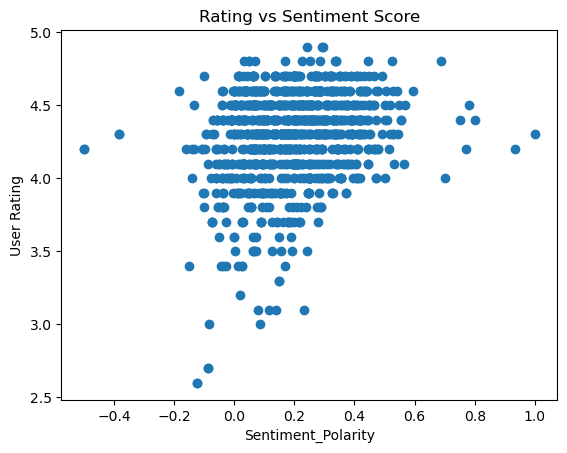

In [23]:
plt.scatter(df['Sentiment_Polarity'], df['Rating'])
plt.xlabel("Sentiment_Polarity")
plt.ylabel("User Rating")
plt.title("Rating vs Sentiment Score")
plt.show()


In [25]:
#analysing updates over time
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce', format='mixed')



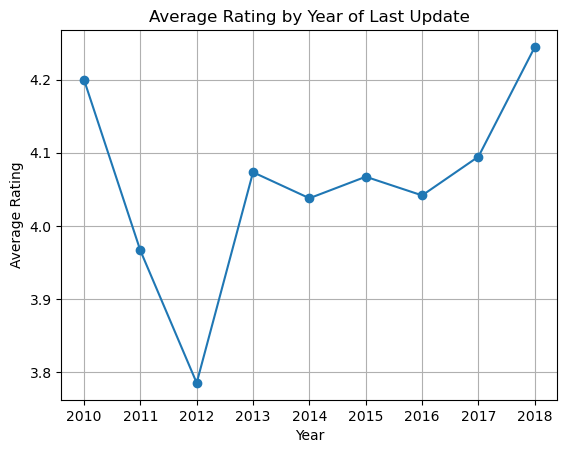

In [27]:
df['Year'] = df['Last Updated'].dt.year

df.groupby('Year')['Rating'].mean().plot(kind='line', marker='o')
plt.title("Average Rating by Year of Last Update")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()


In [38]:
df = pd.read_csv('googleplaystore.csv')

In [42]:
# Calculate average sentiment polarity per app
app_sentiment = df_reviews.groupby('App')['Sentiment_Polarity'].mean().reset_index()

# Merge into main df
df = df.merge(app_sentiment, on='App', how='left')


In [45]:
print(df.columns)


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Sentiment_Polarity'],
      dtype='object')


In [47]:
import numpy as np

def convert_size(size):
    if isinstance(size, str):
        size = size.strip()
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size.lower():
            return float(size.lower().replace('k', '')) / 1024  # convert KB to MB
        elif 'Varies' in size:
            return np.nan
    return np.nan

df['Size_MB'] = df['Size'].apply(convert_size)


In [51]:
df_model = df.dropna(subset=['Rating', 'Reviews', 'Size_MB', 'Price', 'Sentiment_Polarity'])


In [59]:
df['Price'].unique()


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [60]:
# Remove '$' from all values
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=True)

# Force convert to numeric; invalid strings become NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [61]:
#dropping NAN values
df_model = df.dropna(subset=['Rating', 'Reviews', 'Size_MB', 'Price', 'Sentiment_Polarity'])

In [62]:
#now again
#predictive Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df_model[['Reviews', 'Size_MB', 'Price', 'Sentiment_Polarity']]

y = df_model['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

print("R² Score:", model.score(X_test, y_test))

R² Score: 0.4862554179566573


In [63]:
df_model.to_csv('cleaned_googleplaystore.csv', index=False)

